### DADOS

In [104]:
# libs para manipulação de dados
import pandas as pd
import numpy as np

# libs para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

BASE_MUERTES_COVID = '../data/external/muertes-covid-por-pais.csv'
BASE_POBLACION = '../data/external/poblacion-por-pais.csv'

In [106]:
df_muertes = pd.read_csv(
    BASE_MUERTES_COVID,
    sep=',')
df_muertes.columns

Index(['pais', 'fecha inicio', 'fecha fin', 'dias', 'semana',
       'total muertes reportadas', 'total muertes reportadas por covid'],
      dtype='object')

### ITEM 1: TABELA

In [108]:
df_muertes = pd.read_csv(
    BASE_MUERTES_COVID,
    sep=',',
    header=0,
    names=['pais', 'fecha_inicio', 'fecha_fin', 'dias', 'semana', 'total_muertes_reportadas', 'total_muertes_reportadas_por_covid'],
    parse_dates=['fecha_inicio', 'fecha_fin']
    )
df_muertes

,pais,fecha_inicio,fecha_fin,dias,semana,total_muertes_reportadas,total_muertes_reportadas_por_covid
0,Mexico,2014-12-29,2015-01-04,7,1,15101,0
1,Mexico,2015-01-05,2015-01-11,7,2,15449,0
2,Mexico,2015-01-12,2015-01-18,7,3,14820,0
3,Mexico,2015-01-19,2015-01-25,7,4,14172,0
4,Mexico,2015-01-26,2015-02-01,7,5,13628,0
...,...,...,...,...,...,...,...
1327,Brazil,2021-05-01,2021-05-31,31,5,178877,59010
1328,Brazil,2021-06-01,2021-06-30,30,6,178844,55275
1329,Brazil,2021-07-01,2021-07-31,31,7,162439,38304
1330,Brazil,2021-08-01,2021-08-31,31,8,149206,24043


In [75]:
df_poblacion = pd.read_csv('../data/external/poblacion-por-pais.csv', sep=',')
df_poblacion

,Pais,Poblacion
0,Mexico,130262220
1,Peru,33359415
2,Chile,19212362
3,Brazil,213993441
4,Colombia,51265841


In [76]:
df_muertes['total muertes reportadas por covid'].sum()

1225488

In [77]:
df_muertes_agg = df_muertes.groupby('pais')[['total muertes reportadas', 'total muertes reportadas por covid']].sum().reset_index()
df_muertes_agg

,pais,total muertes reportadas,total muertes reportadas por covid
0,Brazil,9626721,596749
1,Chile,665527,37669
2,Colombia,1672460,112826
3,Mexico,5426848,277814
4,Peru,763704,200430


In [78]:
df_muertes_agg = df_muertes_agg.merge(df_poblacion, how='left', left_on='pais', right_on='Pais')
df_muertes_agg = df_muertes_agg[['Pais', 'total muertes reportadas', 'total muertes reportadas por covid', 'Poblacion']]
df_muertes_agg

,Pais,total muertes reportadas,total muertes reportadas por covid,Poblacion
0,Brazil,9626721,596749,213993441
1,Chile,665527,37669,19212362
2,Colombia,1672460,112826,51265841
3,Mexico,5426848,277814,130262220
4,Peru,763704,200430,33359415


In [79]:
df_muertes_agg['muertes covid por cada 100.000 hab'] = df_muertes_agg['total muertes reportadas por covid']/df_muertes_agg['Poblacion']*100000
df_muertes_agg

,Pais,total muertes reportadas,total muertes reportadas por covid,Poblacion,muertes covid por cada 100.000 hab
0,Brazil,9626721,596749,213993441,278.863220
1,Chile,665527,37669,19212362,196.066470
2,Colombia,1672460,112826,51265841,220.080267
3,Mexico,5426848,277814,130262220,213.272889
4,Peru,763704,200430,33359415,600.819888


In [80]:
df_muertes_agg['exceso muertes por cada 100.000 hab'] = (df_muertes_agg['total muertes reportadas'] - df_muertes_agg['total muertes reportadas por covid'])/df_muertes_agg['Poblacion']*100000
df_muertes_agg

,Pais,total muertes reportadas,total muertes reportadas por covid,Poblacion,muertes covid por cada 100.000 hab,exceso muertes por cada 100.000 hab
0,Brazil,9626721,596749,213993441,278.863220,4219.742417
1,Chile,665527,37669,19212362,196.066470,3267.989641
2,Colombia,1672460,112826,51265841,220.080267,3042.247956
3,Mexico,5426848,277814,130262220,213.272889,3952.822238
4,Peru,763704,200430,33359415,600.819888,1688.500833


In [81]:
df_muertes_agg['diferencia entre cifras'] = df_muertes_agg['exceso muertes por cada 100.000 hab'] - df_muertes_agg['muertes covid por cada 100.000 hab']
df_muertes_agg

,Pais,total muertes reportadas,total muertes reportadas por covid,Poblacion,muertes covid por cada 100.000 hab,exceso muertes por cada 100.000 hab,diferencia entre cifras
0,Brazil,9626721,596749,213993441,278.863220,4219.742417,3940.879197
1,Chile,665527,37669,19212362,196.066470,3267.989641,3071.923171
2,Colombia,1672460,112826,51265841,220.080267,3042.247956,2822.167689
3,Mexico,5426848,277814,130262220,213.272889,3952.822238,3739.549349
4,Peru,763704,200430,33359415,600.819888,1688.500833,1087.680944


## ITEM 2: GRÁFICO DE BARRAS

In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
x = df_muertes_agg['Pais']
y = df_muertes_agg[['exceso muertes por cada 100.000 hab', 'diferencia entre cifras']]

<BarContainer object of 5 artists>

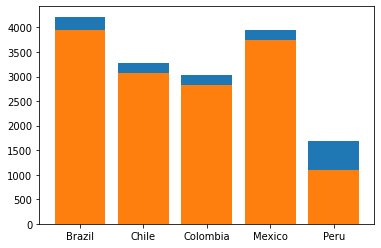

In [84]:
plt.bar(x=x, height=y['exceso muertes por cada 100.000 hab'])
plt.bar(x=x, height=y['diferencia entre cifras'])


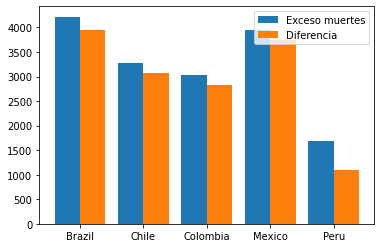

In [85]:
x_axis = np.arange(len(x))

# Multi bar Chart

plt.bar(x_axis -0.2, y['exceso muertes por cada 100.000 hab'], width=0.4, label = 'Exceso muertes')
plt.bar(x_axis +0.2, y['diferencia entre cifras'], width=0.4, label = 'Diferencia')

# Xticks

plt.xticks(x_axis, x)

# Add legend

plt.legend(loc='upper right')

# Display

plt.show()

### ITEM 3: GRÁFICO DE LINHA SEMANAL

Un gráfico por cada país que muestre el comparativo de la evolución en el tiempo de las muertes reportadas COVID-19 vs. el cálculo de “exceso de muertes” semana a semana, ambos datos por cada 100 mil habitantes.

In [ ]:
df_muertes['fecha_inicio_ano_mes'] = df_muertes['fecha_inicio'].dt.year.astype(str) + df_muertes['fecha_inicio'].dt.month.astype(str).str.zfill(2)

In [100]:
df_muertes

,pais,fecha inicio,fecha fin,dias,semana,total muertes reportadas,total muertes reportadas por covid
0,Mexico,2014-12-29,2015-01-04,7,1,15101,0
1,Mexico,2015-01-05,2015-01-11,7,2,15449,0
2,Mexico,2015-01-12,2015-01-18,7,3,14820,0
3,Mexico,2015-01-19,2015-01-25,7,4,14172,0
4,Mexico,2015-01-26,2015-02-01,7,5,13628,0
...,...,...,...,...,...,...,...
1327,Brazil,2021-05-01,2021-05-31,31,5,178877,59010
1328,Brazil,2021-06-01,2021-06-30,30,6,178844,55275
1329,Brazil,2021-07-01,2021-07-31,31,7,162439,38304
1330,Brazil,2021-08-01,2021-08-31,31,8,149206,24043


In [99]:
df_muertes['semana'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53], dtype=int64)

In [87]:
x = df_muertes['semana']
y = df_muertes['total muertes reportadas por covid']
y

0           0
1           0
2           0
3           0
4           0
        ...  
1327    59010
1328    55275
1329    38304
1330    24043
1331    16336
Name: total muertes reportadas por covid, Length: 1332, dtype: int64